In [2]:
import numpy as np
import pickle
from matplotlib import pyplot as plt

In [15]:
def getMPPSignalPlot(exp_no, tag1, tag2, freq, processedDF):
    # freq in mhz
    plt.subplot(2,1,1)
    plt.plot(processedDF[(processedDF['Run Exp Num']==exp_no) & (processedDF['Rx']==tag1) & (processedDF['Tx']==tag2) & (processedDF['Frequency (MHz)']==freq)]["Voltages (mV)"].to_numpy()[0])
    plt.title(f"Rx={tag1}, Tx={tag2}")
    
    plt.subplot(2,1,2)
    v=processedDF[(processedDF['Run Exp Num']==exp_no) & (processedDF['Rx']==tag2) & (processedDF['Tx']==tag1) & (processedDF['Frequency (MHz)']==freq)]["Voltages (mV)"].to_numpy()[0]
    plt.plot(v)
    plt.ylim([np.percentile(v,1), np.percentile(v,99)])
    plt.title(f"Rx={tag2}, Tx={tag1}")
    
    plt.suptitle(f"Exp={exp_no}, freq={freq}")
    plt.tight_layout()
    plt.show()

In [1]:
# steps=[1,2,3,4]
steps=[1]

In [ ]:
with open(f'distances.pkl', 'rb') as f:
    all_distances=pickle.load(f)
    

In [11]:
all_phase_info={}
for step in steps:
    with open(f"Step{step}/no_correction_all_phases.pkl", 'rb') as f:
        all_phase_info[step] = pickle.load(f)

In [14]:
all_voltage_dfs={}
for step in steps:
    with open(f"Step{step}/processedDF.pkl", 'rb') as f:
        all_voltage_dfs[step] = pickle.load(f)

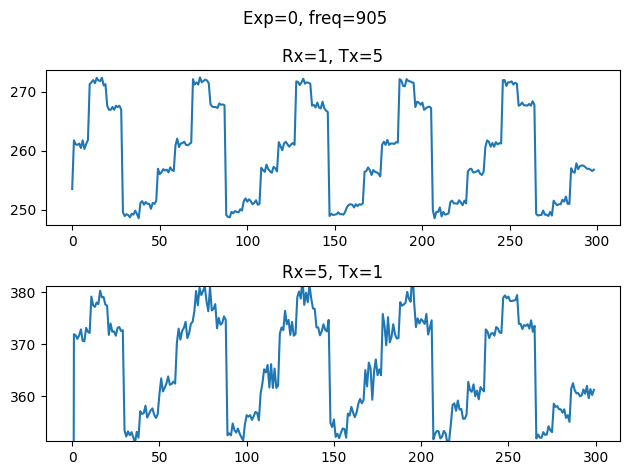

In [75]:
getMPPSignalPlot(0, 1, 5, 905, processedDF=all_voltage_dfs[1])

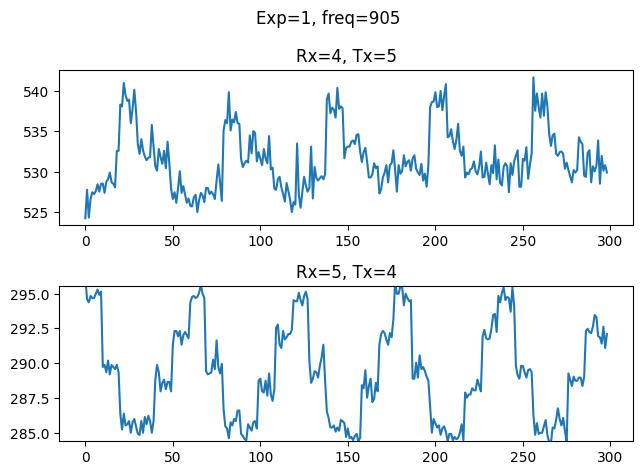

In [100]:
getMPPSignalPlot(1, 4, 5, 905, processedDF=all_voltage_dfs[1])

In [68]:
list(all_phase_info[1].keys())[8:19]

[855000000,
 865000000,
 875000000,
 885000000,
 895000000,
 905000000,
 915000000,
 925000000,
 935000000,
 945000000,
 955000000]

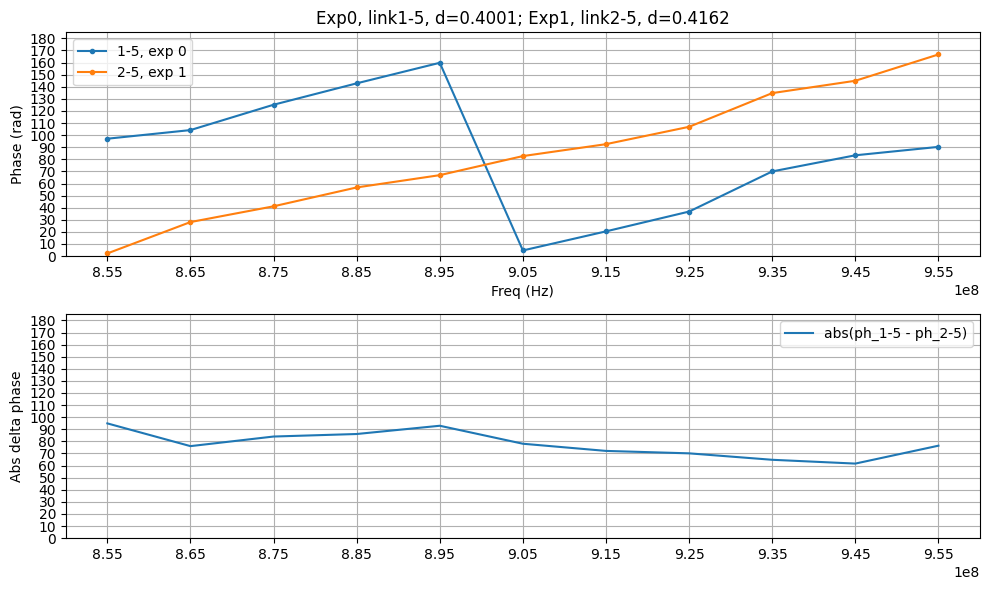

In [107]:
plt.figure(figsize=(10,6))
link1='1-5'
link2='2-5'
exp1=0
exp2=1
step=1
l1_ph=[]
l2_ph=[]
all_freqs=list(all_phase_info[1].keys())[8:19]
for freq in all_freqs:
    l1_ph.append(all_phase_info[1][freq][exp1][0][link1])
    l2_ph.append(all_phase_info[1][freq][exp2][0][link2])

l1_ph=np.array(l1_ph)
l2_ph=np.array(l2_ph)
d_exp1=np.round(all_distances[step][exp1][link1],4)
d_exp2=np.round(all_distances[step][exp2][link2],4)

plt.subplot(2,1,1)
plt.plot(all_freqs,np.rad2deg(l1_ph), '.-', label=f"{link1}, exp {exp1}")
plt.plot(all_freqs,np.rad2deg(l2_ph), '.-', label=f"{link2}, exp {exp2}")
plt.legend()
plt.xticks(np.arange(all_freqs[0],all_freqs[-1]+1, 10e6))
plt.ylim([0,185])
plt.xlabel("Freq (Hz)")
plt.ylabel("Phase (rad)")
plt.yticks(np.arange(0,181,10))
plt.grid()
plt.title(f"Exp{exp1}, link{link1}, d={d_exp1}; Exp{exp2}, link{link2}, d={d_exp2}")

plt.subplot(2,1,2)
plt.plot(all_freqs, np.abs(np.rad2deg(l1_ph-l2_ph)), label=f"abs(ph_{link1} - ph_{link2})")
plt.ylabel("Abs delta phase")
plt.ylim([0,185])
plt.legend()
plt.grid()
plt.xticks(np.arange(all_freqs[0],all_freqs[-1]+1, 10e6))
plt.yticks(np.arange(0,181,10))
plt.tight_layout()
plt.show()
# what is the relation between phase change and t2t distance.............
# get distance matrix from slam info
# ability to plot adc voltages for given experiment number and frequency.

In [83]:
def theta(d,f):
    return (2*np.pi*d*f/3e8)%np.pi

In [87]:
np.rad2deg(theta(0.4001, 915e6)-theta(0.4244, 915e6))

np.float64(-26.681400000000007)

1.8498954181398144